In [304]:
import scipy.io as scio

dataset = scio.loadmat('data_sets/ex5data1')
x_train = dataset['X']
y_train = dataset['y']
x_val = dataset['Xval']
y_val = dataset['yval']
x_test = dataset['Xtest']
y_test = dataset['ytest']

print('x_train.shape:{0}, y_train.shape:{1}'.format(x_train.shape, y_train.shape))
print('x_val.shape:{0}, y_val.shape:{1}'. format(x_val.shape, y_val.shape))
print('x_test.shape:{0}, y_test.shape{1}'.format(x_test.shape, y_test.shape))


x_train.shape:(12, 1), y_train.shape:(12, 1)
x_val.shape:(21, 1), y_val.shape:(21, 1)
x_test.shape:(21, 1), y_test.shape(21, 1)


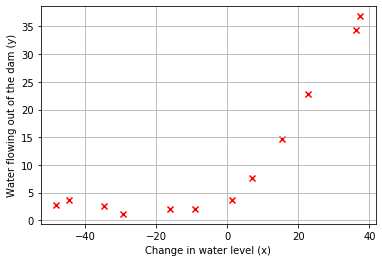

In [305]:
'''
Visualizing the training data
'''
from matplotlib import pyplot as plt

def display_data(x, y):
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.scatter(x, y, c = 'r', marker = 'x')
    plt.grid(True)

plt.figure(0)
display_data(x_train, y_train)
plt.show()

In [306]:
'''
Regularized linear regression cost function
'''
import numpy as np

def cost_reg(theta, x, y, L):
    m = len(y)
    h_x = np.mat(x @ theta).T
    cost_term = (1 / (2 * m)) * np.sum(np.square(h_x - y))
    regular_term = (L / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost_term + regular_term

L = 1
x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
theta = np.ones(x_train.shape[1])
print('theta,shape:', theta.shape)
output = cost_reg(theta, x_train, y_train, L)
print('The output is', output)

theta,shape: (2,)
The output is 303.9931922202643


In [307]:
'''
Regularized linear regression gradient
'''
def gradient_reg(theta, x, y, L):
    """
    theta: 1-d array with shape (2,)
    x: 2-d array with shape (12, 2)
    y: 2-d array with shape (12, 1)
    L: lambda constant
    return: grad should have the same shape with theta (2,)
    """
    grad_term = (x @ theta - y.flatten()) @ x
    reg_term = L * theta
    reg_term[0] = 0
    return (grad_term + reg_term) / len(x)

grad = gradient_reg(theta, x_train, y_train, L)
print('The gradient is', grad)
print('grad.shape', grad.shape)

The gradient is [-15.30301567 598.25074417]
grad.shape (2,)


In [308]:
'''
Fitting linear regression
'''
import scipy.optimize as opt

def train_linear_reg(theta, x, y, L):
    res = opt.minimize(fun = cost_reg,
                     x0 = theta,
                     args = (x, y, L),
                     method = 'TNC',
                     jac = gradient_reg,
                     options = {'maxiter': 400, 'disp':False}
                     )
    return res.x

L = 0
theta = np.zeros(x_train.shape[1])
fit_theta = train_linear_reg(theta, x_train, y_train, L)
print('fit_theta:', fit_theta)

fit_theta: [13.08790351  0.36777923]


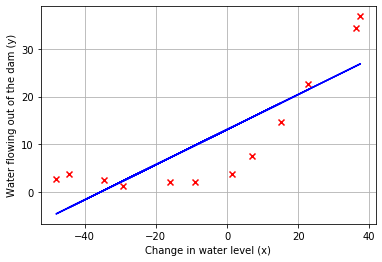

In [309]:
'''
Plot the best fit line
'''
def plot_fit_line(theta, x):
    y_value = x @ theta
    plt.plot(x[:, 1], y_value, c = 'blue')
    

plt.figure(1)
display_data(x_train[:, 1], y_train)
plot_fit_line(fit_theta, x_train)
plt.show()

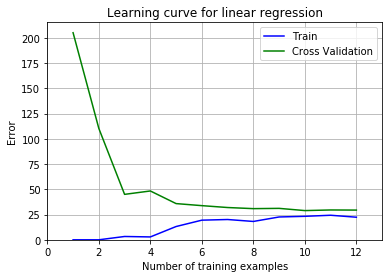

In [310]:
'''
An important concept in machine learning is the bias-variance tradeoﬀ. 
Models with high bias are not complex enough for the data and tend to underﬁt, 
while models with high variance overﬁt to the training data.
'''

'''
Learning curves
'''
def plot_learning_curve(x, y, x_val, y_val, L, num_theta):
    m = len(y)
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(1, m+1):
        x_subsets = x[:i, :]
        y_subsets = y[:i]
        theta = np.zeros(num_theta + 1)
        each_theta = train_linear_reg(theta, x_subsets, y_subsets, L)
        error_train[i - 1] = cost_reg(each_theta, x_subsets, y_subsets, 0)# there remenber to set lambda as zero 
        error_val[i - 1] = cost_reg(each_theta, x_val, y_val, 0)  
    m = np.arange(1, 13)
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.plot(m, error_train, c = 'blue', label = 'Train')
    plt.plot(m, error_val, c = 'green', label = 'Cross Validation')
    plt.legend(loc = 1)
    plt.xlim(0, 13) # the range of axis
    plt.ylim(0)
    plt.grid(True)
    
L = 0
x_val = np.column_stack((np.ones(x_val.shape[0]), x_val))
plt.figure(2)
plot_learning_curve(x_train, y_train, x_val, y_val, L, 1)


In [311]:
'''
Polynomial regression
'''
def poly_features(x, power):
    X_poly = x.copy()
    for i in range(2, power + 1):        
        X_poly = np.column_stack((X_poly, np.power(x, i)))
    return X_poly

def get_mean_std(x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0, ddof = 1)
    return mean, std
'''
Feature scaling
'''
def feature_standard(x, mu, sigma):
    x = (x - mu) / sigma
    return x


In [312]:
POWER = 6
L = 0
x_train_poly = poly_features(dataset['X'], POWER)
mu, sigma = get_mean_std(x_train_poly)
x_train_std = feature_standard(x_train_poly, mu, sigma)
x_train_std = np.column_stack((np.ones(x_train_std.shape[0]), x_train_std))

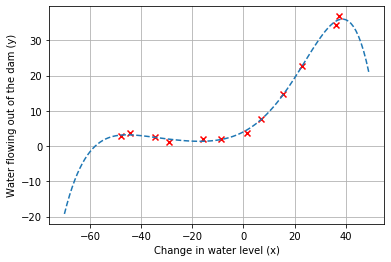

In [313]:
'''
Plot Polynomial fit, Lambda = 0
'''
def plot_poly_fit_line(x, y, mu, sigma, L, power):
    theta = train_linear_reg(np.zeros(power + 1), x, y, L)
    x = np.arange(-70, 50, step = 1, dtype = float)
    x_ = np.column_stack((np.ones(len(x)), (poly_features(x, power) - mu) / sigma))
    y = x_ @ theta
    plt.plot(x, y, linestyle = '--')

plt.figure(3)
display_data(x_train[:, 1], y_train)
plot_poly_fit_line(x_train_std, y_train, mu, sigma, L, POWER)
plt.show()

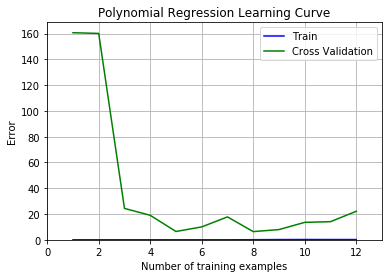

In [314]:
'''
Plot polynomial learning curve, Lambda = 0
'''
x_val_poly = poly_features(dataset['Xval'], POWER)
x_val_std = feature_standard(x_val_poly, mu, sigma) # there mu and sigma must be created by the training set
x_val_std = np.column_stack((np.ones(x_val_std.shape[0]), x_val_std))
plt.figure(4)
plot_learning_curve(x_train_std, y_train, x_val_std, y_val, L, POWER)
plt.title('Polynomial Regression Learning Curve')
plt.show()

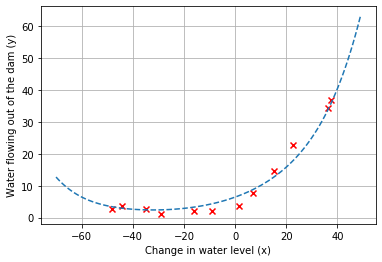

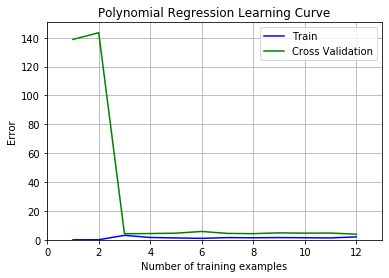

In [315]:
'''
Lambda = 1
'''
L = 1.0
plt.figure(5)
display_data(x_train[:, 1], y_train)
plot_poly_fit_line(x_train_std, y_train, mu, sigma, L, POWER)
plt.show()

plt.figure(6)
plot_learning_curve(x_train_std, y_train, x_val_std, y_val, L, POWER)
plt.title('Polynomial Regression Learning Curve')
plt.show()

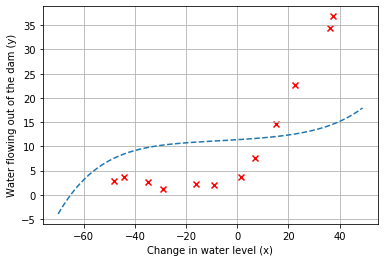

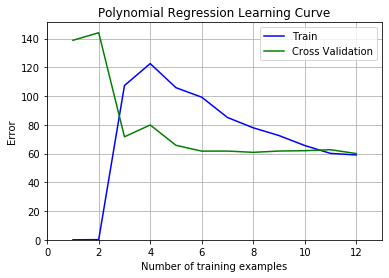

In [316]:
'''
Lambda = 100
'''
L = 100
plt.figure(7)
display_data(x_train[:, 1], y_train)
plot_poly_fit_line(x_train_std, y_train, mu, sigma, L, POWER)
plt.show()

plt.figure(8)
plot_learning_curve(x_train_std, y_train, x_val_std, y_val, L, POWER)
plt.title('Polynomial Regression Learning Curve')
plt.show()

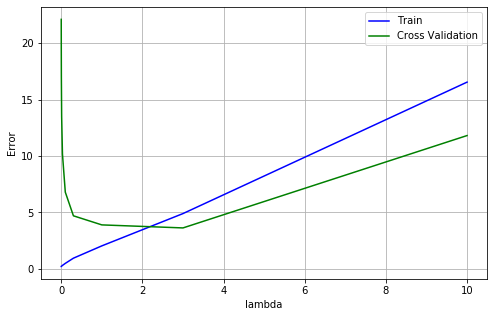

The lambda corresponding to the least error in the errors of a cross validation set is 3.0
error_val: [22.1210761  19.63841061 17.04539278 13.49928714 10.1687533   6.78925113
  4.69115437  3.88480239  3.61627387 11.81137141]


In [317]:
'''
Selecting Lambda using a cross validation set
'''
def validation_curve(theta, x, y, x_val, y_val, Lamb):
    m = len(Lamb)
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(m):        
        theta_ = train_linear_reg(theta, x, y, Lamb[i])
        error_train[i] = cost_reg(theta_, x, y, 0) # there remenber to set lambda as zero 
        error_val[i] = cost_reg(theta_, x_val, y_val, 0) 
    plt.xlabel('lambda')
    plt.ylabel('Error')
    plt.plot(Lamb, error_train, c = 'blue', label = 'Train')
    plt.plot(Lamb, error_val, c = 'green', label = 'Cross Validation')
    plt.legend(loc = 1)
    plt.grid(True)
    return error_val

Lamb = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
plt.figure(9, figsize = (8, 5))
error_val = validation_curve(np.zeros(POWER + 1), x_train_std, y_train, x_val_std, y_val, Lamb)
plt.show()
print('The lambda corresponding to the least error in the errors of a cross validation set is', Lamb[np.argmin(error_val)])
print('error_val:', error_val)

In [318]:
'''
Computing test set error
'''
x_test_poly = poly_features(dataset['Xtest'], POWER)
x_test_std = feature_standard(x_test_poly, mu, sigma) # there mu and sigma must be created by the training set
x_test_std = np.column_stack((np.ones(x_test_std.shape[0]), x_test_std))
theta_ = train_linear_reg(np.zeros(POWER + 1), x_train_std, y_train, 3.0)
error_test = cost_reg(theta_, x_test_std, y_test, 0)
print('When lambda equals 3.0, the test error is:', error_test)

When lambda equals 3.0, the test error is: 4.755272015678817


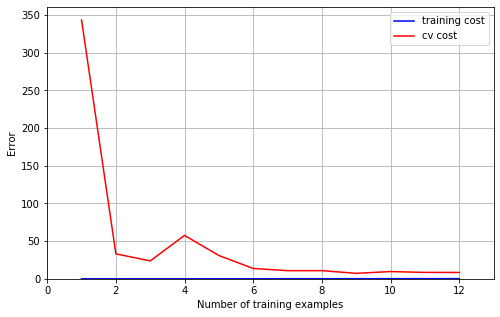

In [381]:
'''
Plotting learning curves with randomly selected examples.
In practice, especially for small training sets, 
when you plot learning curves to debug your algorithms, 
it is often helpful to average across multiple sets of randomly 
selected examples to determine the training error and cross validation error. 
'''
def plot_learning_curves_with_rand_examples(theta, x, y, x_val, y_val, L, times):
    m = len(y)
    error_train, error_val = np.zeros(m), np.zeros(m)
    aver_error_train, aver_error_val = np.zeros(m), np.zeros(m)
    for j in range(times):
        for i in range(1, m+1):
            shuffle_indices = np.random.choice(12, i, replace = False)
            x_train_rand = x[shuffle_indices, :]
            y_train_rand = y[shuffle_indices, :]
            x_val_rand = x_val[shuffle_indices, :]
            y_val_rand = y_val[shuffle_indices, :]
            theta_ = train_linear_reg(theta, x_train_rand, y_train_rand, L)
            error_train[i-1] = cost_reg(theta_, x_train_rand, y_train_rand, 0)
            error_val[i-1] = cost_reg(theta_, x_val_rand, y_val_rand, 0)
        aver_error_train += error_train
        aver_error_val += error_val
    aver_error_train = aver_error_train / times
    aver_error_val = aver_error_val / times
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.plot(np.arange(1, m+1), error_train, c = 'blue', label = 'training cost')
    plt.plot(np.arange(1, m+1), error_val, c = 'red', label = 'cv cost')
    plt.legend(loc = 1)
    plt.xlim(0, 13)
    plt.ylim(0)
    plt.grid(True)

plt.figure(10, figsize=(8, 5))
plot_learning_curves_with_rand_examples(np.zeros(POWER + 1), x_train_std, y_train, x_val_std, y_val, 0.01, 50)
plt.show()